# TF-IDF with real data
<i>Facililated by Josh Mason and Yousif Mansour, 9/22/2023</i>

In [108]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from recommenders.models.tfidf.tfidf_utils import TfidfRecommender
import pickle
import psycopg2

Before running this notebook:
1. Create a PostgreSQL database with the following options:\
    dbname="training_database",\
    user="postgres",\
    password="default",\
    host="localhost",\
    port="5432"

2. From the root directory of this system, run the following command:\
`psql -U postgres -f data_system/data_storage/pg_dump.sql training_database`

This will create a PostgreSQL database with all the metadata in the SQL dump file (pg_dump.sql).

Now, we will connect to that database and extract all the metadata into a pandas data frame.

In [131]:
# Connect to the database with metadata
conn = psycopg2.connect(
    dbname="training_database",
    user="postgres",
    password="default",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()
cursor.execute('SELECT * from dataset')

# Create pandas data frame with metadata
metadata = DataFrame(cursor.fetchall(), columns=['UID', 'Topic', 'Title', 'Description', 'Source', 
                                                 'Tags', 'Licenses', 'Col_names', 'Row_count', 'Col_count', 
                                                 'Entry_count', 'Null_count', 'Usability'])
# why is each sports dataset duplicated three times???
metadata = metadata.drop_duplicates(subset="Title", keep="first").reset_index(drop=True) 
metadata.head()


,UID,Topic,Title,Description,Source,Tags,Licenses,Col_names,Row_count,Col_count,Entry_count,Null_count,Usability
0,245,sports,2022 Game Winner Sports Betting Data,### Context\nA dear friend of mine has a sport...,kaggle,"{games,brazil,sports,gambling,python}","{""Attribution 4.0 International (CC BY 4.0)""}","{Data,Entrada,FunÃ§Ã£o,Fundamento,Investimento...",3691,45,27454,91,0.941176
1,246,sports,Find the Sports (Object Detection),I have used alot of Kaggle Datasets and I want...,kaggle,"{sports,""computer science""}",{CC-BY-SA-4.0},"{ImageID,XMin,YMin,XMax,YMax,Labels,OriginalUR...",6538,21,47887,0,0.882353
2,247,sports,Forbes Highest Paid Athletes 1990-2020,### Context\n\nHere is a completel list of the...,kaggle,{sports},{CC0-1.0},"{S.NO,Name,Nationality,""Current Rank"",""Previou...",301,8,2408,24,0.823529
3,248,sports,H&M Sports Apparel Data Set(9k+),The H&M Sports Apparel Data Set is a comprehen...,kaggle,"{global,sports,""clothing and accessories"",begi...",{CC0-1.0},"{Name_of_product,category,""price_of_product(in...",9146,8,73168,0,1.000000
4,249,sports,Men's Professional Basketball,"This dataset contains stats on players, coache...",kaggle,{basketball},{other},"{abbrev_type,code,full_name,year,coachID,award...",21821,156,394013,59750,0.852941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,307,sports,NFL scores and betting data,### Context\n\nNational Football League histor...,kaggle,"{sports,gambling}",{CC-BY-NC-SA-4.0},"{stadium_name,stadium_location,stadium_open,st...",13952,41,236668,28093,1.000000
63,308,sports,Online Sports Betting,# Online Sports Betting\n### A State-by-State ...,kaggle,"{sports,gambling}",{other},"{year,unsheltered,sheltered,""Unnamed: 0"",""new ...",306,65,3195,944,0.941176
64,309,sports,Political Donations By American Sports Owners,## ABOUT DATA SET\nAmerican professional sport...,kaggle,"{sports,politics,""exploratory data analysis"",""...",{CC0-1.0},"{Owner,Team,League,Recipient,Amount,""Election ...",2798,7,19586,9,1.000000
65,310,sports,Sports Car Prices dataset,This dataset contains information about the pr...,kaggle,"{beginner,intermediate,tabular,regression,""ret...","{""Attribution 4.0 International (CC BY 4.0)""}","{""ï»¿Car Make"",""Car Model"",Year,""Engine Size (...",1007,8,8056,13,1.000000


Here is some information about the metadata pulled in:

In [135]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UID          47 non-null     int64  
 1   Topic        47 non-null     object 
 2   Title        47 non-null     object 
 3   Description  47 non-null     object 
 4   Source       47 non-null     object 
 5   Tags         47 non-null     object 
 6   Licenses     47 non-null     object 
 7   Col_names    47 non-null     object 
 8   Row_count    47 non-null     int64  
 9   Col_count    47 non-null     int64  
 10  Entry_count  47 non-null     int64  
 11  Null_count   47 non-null     int64  
 12  Usability    47 non-null     float64
dtypes: float64(1), int64(5), object(7)
memory usage: 4.9+ KB


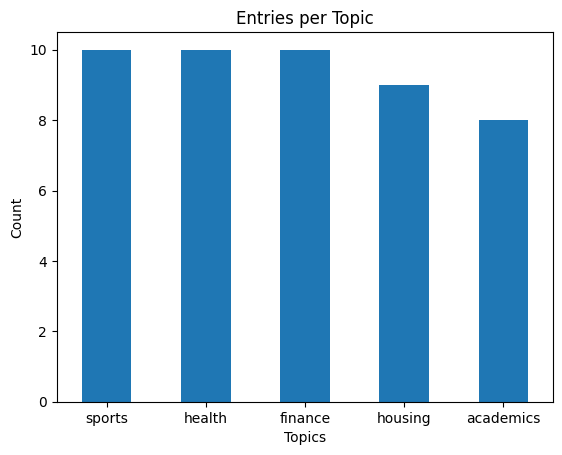

In [136]:
topic_counts = metadata['Topic'].value_counts()

topic_counts.plot(kind='bar')
plt.title('Entries per Topic')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

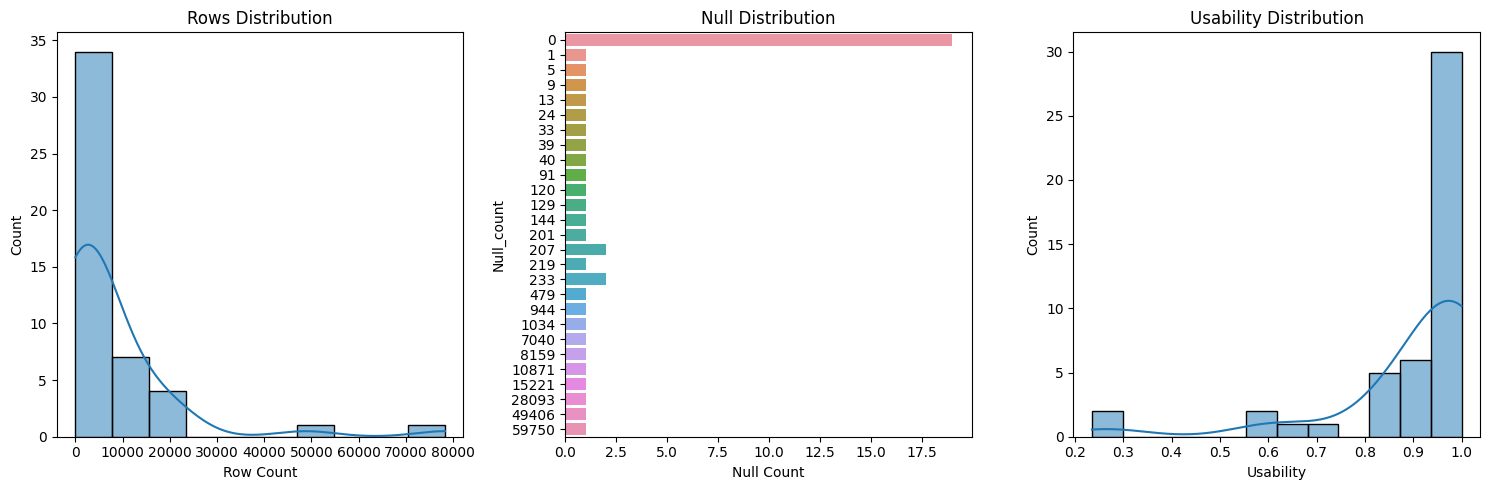

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Size plot
sns.histplot(data=metadata, x='Row_count', kde=True, ax=axes[0], bins=10)
axes[0].set_title('Rows Distribution')
axes[0].set_xlabel('Row Count')

# Source plot
sns.countplot(data=metadata, y='Null_count', ax=axes[1])
axes[1].set_title('Null Distribution')
axes[1].set_xlabel('Null Count')

# Usability plot
sns.histplot(data=metadata, x='Usability', kde=True, ax=axes[2])
axes[2].set_title('Usability Distribution')
axes[2].set_xlabel('Usability')

plt.tight_layout()
plt.show()

In [115]:
all_tags = metadata['Tags'].tolist()
all_tags = [tag for tags_list in all_tags for tag in tags_list]
unique = set(all_tags)
num_tags= len(unique)

print(f"Number of unique tags: {num_tags}")

Number of unique tags: 31


### 2. Instantiate the recommender

These are the following tokenization methods available out-of-the-box with this implementation:

| tokenization_method | Description                                                                                                                      |
|:--------------------|:---------------------------------------------------------------------------------------------------------------------------------|
| 'none'              | No tokenization is applied. Each word is considered a token.                                                                     |
| 'nltk'              | Simple stemming is applied using NLTK.                                                                                           |
| 'bert'              | HuggingFace BERT word tokenization ('bert-base-cased') is applied.                                                               |
| 'scibert'           | SciBERT word tokenization ('allenai/scibert_scivocab_cased') is applied.<br>This is recommended for scientific journal articles. |

<i>Source: [Microsoft Recommender](https://github.com/recommenders-team/recommenders/blob/main/examples/00_quick_start/tfidf_covid.ipynb)</i>

In [137]:
# TODO: Recommender breaks if another tokenization method is used
recommender = TfidfRecommender(id_col='UID', tokenization_method='scibert')

### 3. Prepare text for use in the TF-IDF model

Here we will...

In [138]:
# Assign columns to clean and combine
metadata = metadata.astype(str) # combined columns have to all be strings
metadata = metadata.applymap(lambda x: x.lower())

# For now, we will use all columns except the UID
cols_to_clean = metadata.columns.tolist()
cols_to_clean.remove("UID") 

clean_col = 'cleaned_text'
df_clean = recommender.clean_dataframe(metadata, cols_to_clean, clean_col)
df_clean.head()

,UID,Topic,Title,Description,Source,Tags,Licenses,Col_names,Row_count,Col_count,Entry_count,Null_count,Usability,cleaned_text
0,245,sports,2022 game winner sports betting data,### context\na dear friend of mine has a sport...,kaggle,"{games,brazil,sports,gambling,python}","{""attribution 4.0 international (cc by 4.0)""}","{data,entrada,funã§ã£o,fundamento,investimento...",3691,45,27454,91,0.9411764705882353,sports 2022 game winner sports betting data c...
1,246,sports,find the sports (object detection),i have used alot of kaggle datasets and i want...,kaggle,"{sports,""computer science""}",{cc-by-sa-4.0},"{imageid,xmin,ymin,xmax,ymax,labels,originalur...",6538,21,47887,0,0.8823529411764706,sports find the sports object detection i have...
2,247,sports,forbes highest paid athletes 1990-2020,### context\n\nhere is a completel list of the...,kaggle,{sports},{cc0-1.0},"{s.no,name,nationality,""current rank"",""previou...",301,8,2408,24,0.8235294117647058,sports forbes highest paid athletes 19902020 ...
3,248,sports,h&m sports apparel data set(9k+),the h&m sports apparel data set is a comprehen...,kaggle,"{global,sports,""clothing and accessories"",begi...",{cc0-1.0},"{name_of_product,category,""price_of_product(in...",9146,8,73168,0,1.0,sports hm sports apparel data set9k the hm spo...
4,249,sports,men's professional basketball,"this dataset contains stats on players, coache...",kaggle,{basketball},{other},"{abbrev_type,code,full_name,year,coachid,award...",21821,156,394013,59750,0.8529411764705882,sports mens professional basketball this datas...


In [139]:
# Tokenize text with tokenization_method specified in class instantiatio
tf, vectors_tokenized = recommender.tokenize_text(df_clean, text_col=clean_col)

### 4. Recommend articles using TF-IDF

In [140]:
# Fit the TF-IDF vectorizer
recommender.fit(tf, vectors_tokenized)

# Get recommendations
top_k_recommendations = recommender.recommend_top_k_items(df_clean, k=10)

In [147]:
# Serialize model
model_path = Path("../../backend/models/model.pkl")
with open(model_path, 'wb') as file:
    pickle.dump(recommender, file)

In our recommendation table, each row represents a single recommendation.

- **UID** corresponds to the article that is being used to make recommendations from.
- **rec_rank** contains the recommdation's rank (e.g., rank of 1 means top recommendation).
- **rec_score** is the cosine similarity score between the query article and the recommended article.
- **rec_cord_uid** corresponds to the recommended article.

In [142]:
# Preview the recommendations
top_k_recommendations

,UID,rec_rank,rec_score,rec_UID
0,245,1,0.136549,250
1,245,2,0.096973,251
2,245,3,0.041816,285
3,245,4,0.038516,291
4,245,5,0.038439,274
...,...,...,...,...
465,291,6,0.038516,245
466,291,7,0.037305,285
467,291,8,0.033180,289
468,291,9,0.028143,290


In [143]:
# view full recommendation list
full_rec_list = recommender.recommendations

article_of_interest = '245'
print('Number of recommended articles for ' + article_of_interest + ': ' + str(len(full_rec_list[article_of_interest])))

Number of recommended articles for 245: 46


In [144]:
metadata[metadata.UID == article_of_interest]

,UID,Topic,Title,Description,Source,Tags,Licenses,Col_names,Row_count,Col_count,Entry_count,Null_count,Usability
0,245,sports,2022 game winner sports betting data,### context\na dear friend of mine has a sport...,kaggle,"{games,brazil,sports,gambling,python}","{""attribution 4.0 international (cc by 4.0)""}","{data,entrada,funã§ã£o,fundamento,investimento...",3691,45,27454,91,0.9411764705882353


In [145]:
# Optionally view tokens
tokens = recommender.get_tokens()
# Preview 10 tokens
print(list(tokens.keys())[:10])
# Preview just the first 10 stop words sorted alphabetically
stop_words = list(recommender.get_stop_words())
stop_words.sort()
print(stop_words[:10])

['sports', '202', 'game', 'win', 'ner', 'bet', 'ting', 'data', 'context', 'ar']
['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost']


In [146]:
# Final Recs
cols_to_keep = cols_to_clean
recommender.get_top_k_recommendations(metadata,article_of_interest,cols_to_keep)
# TODO: why cant display UID??

,rank,similarity_score,Topic,Title,Description,Source,Tags,Licenses,Col_names,Row_count,Col_count,Entry_count,Null_count,Usability
0,1,0.136549,sports,nfl scores and betting data,### context\n\nnational football league histor...,kaggle,"{sports,gambling}",{cc-by-nc-sa-4.0},"{stadium_name,stadium_location,stadium_open,st...",13952,41,236668,28093,1.0
1,2,0.096973,sports,online sports betting,# online sports betting\n### a state-by-state ...,kaggle,"{sports,gambling}",{other},"{year,unsheltered,sheltered,""unnamed: 0"",""new ...",306,65,3195,944,0.9411764705882353
2,3,0.041816,finance,finance company loan data,### the data set has been taken from\nhttps://...,kaggle,{finance},{unknown},"{loan_id,loan_status,gender,married,dependents...",1348,27,13120,233,0.6470588235294118
3,4,0.038516,finance,yahoo finance apple inc. (aapl),### context\n\nthis is historical data which c...,kaggle,"{business,finance,marketing,""exploratory data ...",{copyright-authors},"{date,open,high,low,close,""adj close"",volume}",321,21,2247,0,0.9411764705882353
4,5,0.038439,health,ghana health facilities,## context\nthis dataset is provided as part o...,kaggle,"{healthcare,""earth and nature"",health,""social ...",{dbcl-1.0},"{region,district,facilityname,type,town,owners...",5231,11,34473,201,0.8823529411764706
5,6,0.037572,sports,sports car prices dataset,this dataset contains information about the pr...,kaggle,"{beginner,intermediate,tabular,regression,""ret...","{""attribution 4.0 international (cc by 4.0)""}","{""ï»¿car make"",""car model"",year,""engine size (...",1007,8,8056,13,1.0
6,7,0.033889,academics,survey academics,\nto cite this data set: j. berengueres and p....,kaggle,"{business,education,""social science"",psychology}",{odbl-1.0},"{ï»¿stress,hindex,tenured,subjective.happyness...",6517,54,121398,49406,0.9705882352941176
7,8,0.033519,sports,sports stadium locations,### content\n\ncontains the latitude and longi...,kaggle,"{football,baseball,basketball,sports,tabular}",{cc0-1.0},"{ï»¿team,league,division,lat,long}",151,5,755,0,0.9411764705882353
8,9,0.030545,sports,h&m sports apparel data set(9k+),the h&m sports apparel data set is a comprehen...,kaggle,"{global,sports,""clothing and accessories"",begi...",{cc0-1.0},"{name_of_product,category,""price_of_product(in...",9146,8,73168,0,1.0
9,10,0.030414,sports,find the sports (object detection),i have used alot of kaggle datasets and i want...,kaggle,"{sports,""computer science""}",{cc-by-sa-4.0},"{imageid,xmin,ymin,xmax,ymax,labels,originalur...",6538,21,47887,0,0.8823529411764706


In [ ]:
full_rec_list

{'1': [(0.1468160851392342, '2'),
  (0.1359126015351822, '4'),
  (0.09983522742920584, '5'),
  (0.09763022228914314, '6'),
  (0.07913184161330096, '8'),
  (0.07374285570465379, '7'),
  (0.061417411373365406, '9'),
  (0.03457619216149142, '10'),
  (0.022604881033718802, '33'),
  (0.019772308034270332, '49'),
  (0.019490744915321295, '21'),
  (0.019205428741174337, '11'),
  (0.018812769330634804, '17'),
  (0.01738853007945406, '41'),
  (0.015163072132233038, '12'),
  (0.014884828792053377, '31'),
  (0.014814132545724761, '22'),
  (0.014340242885032096, '29'),
  (0.013982145142032087, '50'),
  (0.01253261533495018, '36'),
  (0.012315028111303786, '3'),
  (0.011153193479166839, '27'),
  (0.010116869429567403, '43'),
  (0.009619735478694018, '44'),
  (0.009495640245302691, '19'),
  (0.009129556595903998, '16'),
  (0.008155730553045155, '32'),
  (0.007953515578930382, '25'),
  (0.007839871641238984, '48'),
  (0.007534630161927507, '38'),
  (0.00733393464422093, '34'),
  (0.007089619278749053